In [23]:
import twitter

In [5]:
api = twitter.Api(consumer_key='',
                      consumer_secret='',
                      access_token_key='',
                      access_token_secret='')

In [6]:
print(api.VerifyCredentials())

{"created_at": "Wed Nov 06 14:03:45 +0000 2019", "default_profile": true, "default_profile_image": true, "id": 1192080090055745536, "id_str": "1192080090055745536", "name": "Aga", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "Aga96605377"}


In [7]:
x =api.GetSearch(
    raw_query="q=%23brexit%20&result_type=recent")

In [5]:
x

[Status(ID=1193955375898415104, ScreenName=RoyHStAsaph, Created=Mon Nov 11 18:15:18 +0000 2019, Text='RT @RCorbettMEP: .\nSo, #Farage, #Johnson &amp; #Trump are now in an open alliance to force through #Brexit and  send £500 million per week from…'),
 Status(ID=1193955371754381313, ScreenName=ReadSmall, Created=Mon Nov 11 18:15:17 +0000 2019, Text='RT @MarkWeightman: @StandUp4Brexit @malfouru48 @BorisJohnson A @Conservatives #Brexit is vassalage. No #brexit at all.'),
 Status(ID=1193955365324574720, ScreenName=TCiiLondon, Created=Mon Nov 11 18:15:16 +0000 2019, Text='UK employers still hiring despite Brexit uncertainty – latest report. https://t.co/QvP5e8s0f3 #recruitment #brexit… https://t.co/4Nrg0z2Tgt'),
 Status(ID=1193955359662231553, ScreenName=PaulWhelan745, Created=Mon Nov 11 18:15:15 +0000 2019, Text='RT @Haggis_UK: Sam Gyimah - Every #brexit option leaves us weaker &amp; poorer as a country... so our best deal is our current deal. The Tory b…'),
 Status(ID=1193955354842927107,

In [12]:
x[9].text

'RT @CeleryVase: Lifelong Spiv, @Nigel_Farage, has admitted LIVE on @LBC that he conned 3000 gullible planks who applied to be PPCs in his p…'

In [14]:
import nltk

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/aga/nltk_data...


True

In [9]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [37]:
# nltk_results = [nltk_sentiment(row) for x.text in x]
# results_df = pd.DataFrame(nltk_results)
# text_df = pd.DataFrame(dataset, columns = ['text'])
# nltk_df = text_df.join(results_dfi
for tweet in x:
    print(nltk_sentiment(tweet.text))
    print(tweet.text)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @RCorbettMEP: .
So, #Farage, #Johnson &amp; #Trump are now in an open alliance to force through #Brexit and  send £500 million per week from…
{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}
RT @MarkWeightman: @StandUp4Brexit @malfouru48 @BorisJohnson A @Conservatives #Brexit is vassalage. No #brexit at all.
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.2584}
UK employers still hiring despite Brexit uncertainty – latest report. https://t.co/QvP5e8s0f3 #recruitment #brexit… https://t.co/4Nrg0z2Tgt
{'neg': 0.169, 'neu': 0.69, 'pos': 0.14, 'compound': 0.0202}
RT @Haggis_UK: Sam Gyimah - Every #brexit option leaves us weaker &amp; poorer as a country... so our best deal is our current deal. The Tory b…
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @MPF1419: Let me repeat. a Farage and Johnson alliance is on the spectrum of politics that HITLER was at the far end of. How can any san…
{'neg': 0.0, 'neu':

In [12]:
def count_sentiment(tweets):
    positive = 0
    negative = 0
    neutral = 0
    for tweet in tweets:
        if nltk_sentiment(tweet.text)['compound'] > 0:
            positive += 1
        elif nltk_sentiment(tweet.text)['compound'] < 0:
            negative += 1
        else:
            neutral += 1
    return [positive, negative, neutral]

In [29]:
counts = count_sentiment(x)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [48]:
label = ['positive', 'negative', 'neutral']
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    bar = plt.bar(index, counts)
    bar[0].set_color('g')
    bar[1].set_color('r')
    bar[2].set_color('b')
    plt.xlabel('Sentiment', fontsize=10)
    plt.ylabel('No of tweets', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Sentiment of latest brexit tweets')
    plt.show()

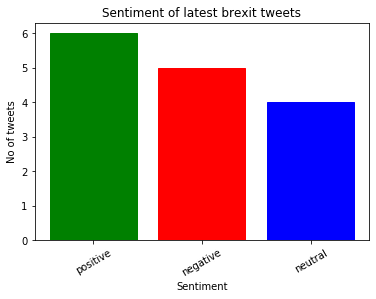

In [49]:
plot_bar_x()